<a href="https://colab.research.google.com/github/RicStrong/JobPostingAnalysis/blob/master/JobPostingsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Getting Set Up, Downloading the Data

https://www.kaggle.com/promptcloud/us-job-data-careerbuildercom-2019


This dataset was extracted and uploaded for the main reason for researchers, students, and companies that want to position themselves strategically in the various fields of recruiting candidates for their organizations. Students and researchers can use this dataset to come up with different case studies and project manuals for the same.

The File Contains the Following Fields:

1. Unique ID
2. Crawl TimeStamp
3. URL
4. Job Title
5. Company
6. City
7. Branch
8. State
9. Country
10. Post Date
11. Job Description
12. Job Category

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [25]:
!sudo -H pip3 install spacy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [23]:
!pip install --upgrade pip
!pip install textacy

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1)


In [3]:
#Get the json file for the API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ewarmstrong0710","key":"75937a4490f57b7cf9289e034cd28f32"}'}

In [0]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d promptcloud/us-job-data-careerbuildercom-2019

 76% 33.0M/43.5M [00:02<00:00, 14.5MB/s]
100% 43.5M/43.5M [00:02<00:00, 22.0MB/s]


In [6]:
!unzip \*.zip

Archive:  us-job-data-careerbuildercom-2019.zip
  inflating: home/sdf/marketing_sample_for_careerbuilder_com-jobs__20190901_20191231__30k_data.ldjson  


###Imports!

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)
import spacy
import random
from collections import Counter #for counting
import json

def pretty_print(pp_object):
    print(json.dumps(pp_object, indent=2))
    
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Setting the Data Frame

In [9]:
df = pd.read_json (r'home/sdf/marketing_sample_for_careerbuilder_com-jobs__20190901_20191231__30k_data.ldjson', lines=True)
df = df[['job_description']]
df

,job_description
0,"ABOUT THE JOB (JOB BRIEF):At Key, we have the ..."
1,ABOUT THE JOB (JOB BRIEF): Focuses on acquisit...
2,Important Note: During the application process...
3,Ref ID: 00412-9502197509Classification: Portfo...
4,Tentative Schedule: Must be available to work ...
...,...
30001,TransPerfect Is More Than Just a Job…Our great...
30002,About the Company Our client is a growing and ...
30003,Summary: The Veterinary Assistant is a key mem...
30004,Basic Qualifications Bachelor's degree in Logi...


In [0]:
#Lots of missing values!!
#df.isna().mean() * 100

In [0]:
nlp = spacy.load('en_core_web_sm')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [29]:
explain_text_entities(df['job_description'][30])

Entity: Assists, Label: NORP, Nationalities or religious or political groups
Entity: weekly, Label: DATE, Absolute or relative dates or periods
Entity: hours, Label: TIME, Times smaller than a day
Entity: Develops, Label: PERSON, People, including fictional
Entity: Community Resource Manual, Label: ORG, Companies, agencies, institutions, etc.
Entity: Employee Handbook, Label: ORG, Companies, agencies, institutions, etc.
Entity: the Facility Policies and Procedures Manual, Label: ORG, Companies, agencies, institutions, etc.
Entity: more years, Label: DATE, Absolute or relative dates or periods


In [30]:
#noun chunks!
example_text = df['job_description'][30]
doc = nlp(example_text)
spacy.displacy.render(doc, style='ent', jupyter=True)

for idx, sentence in enumerate(doc.sents):
    for noun in sentence.noun_chunks:
        print(f"sentence {idx+1} has noun chunk '{noun}'")

sentence 1 has noun chunk 'Facility'
sentence 1 has noun chunk 'OAKLAND CENTER Compensation Base'
sentence 2 has noun chunk 'Compensation Bonus'
sentence 3 has noun chunk 'Equal Opportunity Employer'
sentence 4 has noun chunk 'Summary'
sentence 5 has noun chunk 'This position'
sentence 5 has noun chunk 'employment job searches'
sentence 5 has noun chunk 'residents'
sentence 5 has noun chunk 'the community'
sentence 5 has noun chunk 'initial assessment'
sentence 5 has noun chunk 'scheduling'
sentence 5 has noun chunk 'supervision'
sentence 5 has noun chunk 'residents'
sentence 6 has noun chunk 'It'
sentence 6 has noun chunk 'all field and phone surveillance requirements'
sentence 7 has noun chunk 'addition'
sentence 7 has noun chunk 'it'
sentence 7 has noun chunk 'individual and group job readiness discussions'
sentence 7 has noun chunk 'training'
sentence 7 has noun chunk 'accordance'
sentence 7 has noun chunk 'organizational policies'
sentence 7 has noun chunk 'contract requirements'


In [32]:
one_sentence = df['job_description'][9]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent', jupyter=True)

for token in doc:
    print(token, token.pos_)

Assignment PROPN
OverviewEntry PROPN
level NOUN
position NOUN
. PUNCT
Provides VERB
support NOUN
within ADP
a DET
warehouse NOUN
setting NOUN
. PUNCT
Must VERB
be AUX
able ADJ
to PART
lift VERB
25 NUM
lbs NOUN
. PUNCT
and CCONJ
provide VERB
support NOUN
as SCONJ
directed VERB
. PUNCT
Estimated ADJ
Work NOUN
Start PROPN
Date PROPN
04-Nov-2019 NOUN
Estimated VERB
Work PROPN
End PROPN
Date PROPN
02-May-2020 PUNCT


In [0]:
text = df['job_description'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

In [0]:
doc = nlp(text)

In [0]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

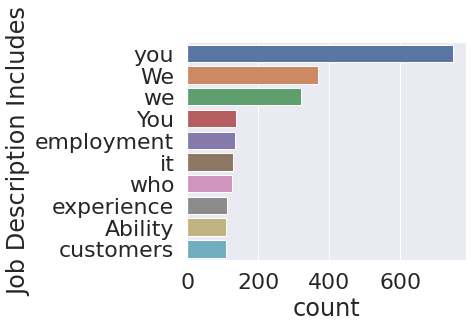

In [37]:
df_nouns = pd.DataFrame(items_of_interest, columns=["Job Description Includes"])
plt.figure(figsize=(5,4))
sns.countplot(y="Job Description Includes",
             data=df_nouns,
             order=df_nouns["Job Description Includes"].value_counts().iloc[:10].index)
plt.show()

In [0]:
posting_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        posting_topics.append(token)
        
posting_topics = [str(x) for x in posting_topics]

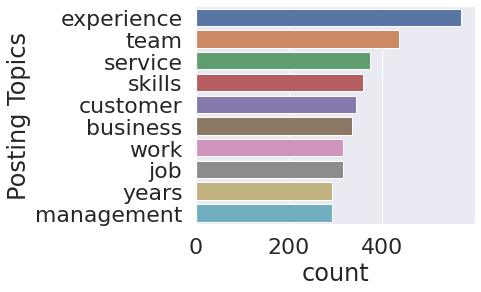

In [40]:
df_nouns = pd.DataFrame(posting_topics, columns=["Posting Topics"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Posting Topics",
             data=df_nouns,
             order=df_nouns["Posting Topics"].value_counts().iloc[:10].index)
plt.show()

In [0]:
posting_topics = []
for ent in doc.ents:
    if ent.label_ not in ["PERCENT", "CARDINAL", "DATE"]:
#         print(ent.text,ent.label_)
        posting_topics.append(ent.text.strip())

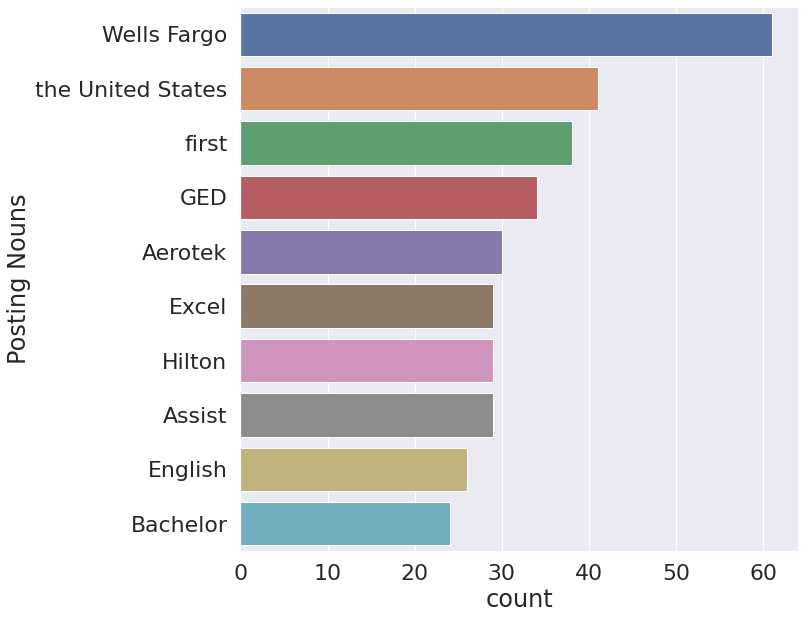

In [53]:
df_ttopics = pd.DataFrame(posting_topics, columns=["Posting Nouns"])
plt.figure(figsize=(10,10))
sns.countplot(y="Posting Nouns",
             data=df_ttopics,
             order=df_ttopics["Posting Nouns"].value_counts().iloc[0:10].index)

plt.savefig("abc.png")
files.download("abc.png") 
plt.show()

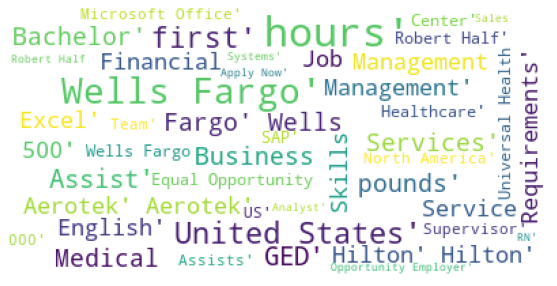

In [44]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str(posting_topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()